# 05.00 Investigate and Remedy Correlations

This notebook captures a review of correlations among variables remaining in our prepared data set and results in the data set used in subsequent model development steps.


In [1]:
# Load libraries
import pandas as pd
import numpy as np


import statsmodels.api as sm
import category_encoders as ce

import matplotlib.pyplot as plt
import seaborn as sns

## Read Prepared Data

In [2]:
df = pd.read_csv("data/04.a.Detail_Incident_AtOpen.csv")
print("df.shape: " + str(df.shape))
print("df.columns: " + str(df.columns))
print("df.dtypes: \n" + str(df.dtypes))

df.shape: (35208, 12)
df.columns: Index(['CI_Name_aff', 'Service_Component_WBS_aff', 'Impact', 'Urgency',
       'KM_number', 'Count_Related_Interactions', 'Count_Related_Incidents',
       'Count_Related_Changes', 'SLAFail', 'Open_Time_HourOfDay',
       'Open_Time_DayOfWeek', 'CI_TypeSubType_aff'],
      dtype='object')
df.dtypes: 
CI_Name_aff                    object
Service_Component_WBS_aff      object
Impact                         object
Urgency                        object
KM_number                      object
Count_Related_Interactions    float64
Count_Related_Incidents       float64
Count_Related_Changes         float64
SLAFail                         int64
Open_Time_HourOfDay             int64
Open_Time_DayOfWeek            object
CI_TypeSubType_aff             object
dtype: object


## Set X and y

In [3]:
y = df.SLAFail
y.shape

(35208,)

In [4]:
X = df.drop(['SLAFail'], axis='columns')
X.shape

(35208, 11)

In [5]:
X.Open_Time_HourOfDay = X.Open_Time_HourOfDay.astype('object')

In [6]:
categorical_features = X.select_dtypes(include=['object']).columns
categorical_features

Index(['CI_Name_aff', 'Service_Component_WBS_aff', 'Impact', 'Urgency',
       'KM_number', 'Open_Time_HourOfDay', 'Open_Time_DayOfWeek',
       'CI_TypeSubType_aff'],
      dtype='object')

In [7]:
encoder = ce.WOEEncoder()

In [8]:
X = encoder.fit_transform(X,y)

In [9]:
corrMatrix = X.corr()

In [10]:
corrMatrix

,CI_Name_aff,Service_Component_WBS_aff,Impact,Urgency,KM_number,Count_Related_Interactions,Count_Related_Incidents,Count_Related_Changes,Open_Time_HourOfDay,Open_Time_DayOfWeek,CI_TypeSubType_aff
CI_Name_aff,1.000000,0.749470,0.146698,0.140842,0.742310,0.004046,0.022772,0.019978,0.027004,0.022354,0.412196
Service_Component_WBS_aff,0.749470,1.000000,0.130958,0.115506,0.589654,-0.008976,0.016204,0.040969,0.027506,0.023286,0.411194
Impact,0.146698,0.130958,1.000000,0.965060,0.150859,0.001587,0.039165,-0.006847,0.020959,-0.005394,0.232266
Urgency,0.140842,0.115506,0.965060,1.000000,0.156142,0.004823,0.039041,-0.002827,0.024177,-0.007022,0.238587
KM_number,0.742310,0.589654,0.150859,0.156142,1.000000,0.014362,0.020214,0.008961,0.025502,0.015104,0.377400
Count_Related_Interactions,0.004046,-0.008976,0.001587,0.004823,0.014362,1.000000,0.211627,0.053415,-0.013833,-0.011234,-0.001916
Count_Related_Incidents,0.022772,0.016204,0.039165,0.039041,0.020214,0.211627,1.000000,0.037681,-0.022064,0.000696,-0.006743
Count_Related_Changes,0.019978,0.040969,-0.006847,-0.002827,0.008961,0.053415,0.037681,1.000000,-0.014963,-0.015381,-0.030549
Open_Time_HourOfDay,0.027004,0.027506,0.020959,0.024177,0.025502,-0.013833,-0.022064,-0.014963,1.000000,0.076014,0.008152
Open_Time_DayOfWeek,0.022354,0.023286,-0.005394,-0.007022,0.015104,-0.011234,0.000696,-0.015381,0.076014,1.000000,0.005052


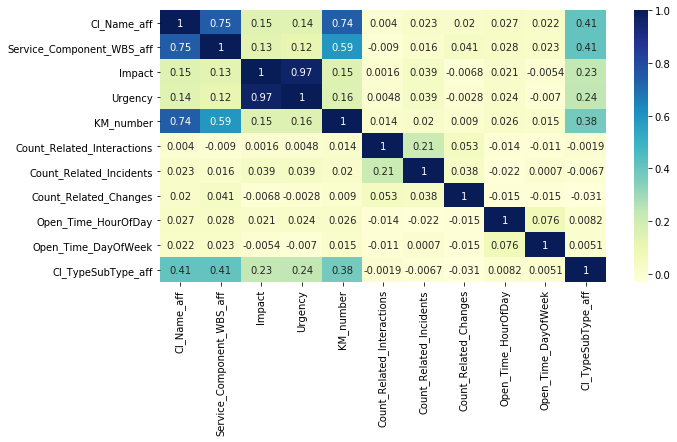

In [11]:
plt.figure(figsize=(10,5))
sns.heatmap(corrMatrix, cmap="YlGnBu", annot=True)

**Observation:** `Impact` and `Urgency` represent a highly correlated pair. 

- **Action:** Drop `Impact`

**Observation:** `CI_Name_aff`, `Service_Component_WBS_aff`,  and `KM_number` represent a highly correlated trio. 

- **Action:** Drop `CI_Name_aff`

In [12]:
XnoCIName = X.drop(['CI_Name_aff', 'Impact'], axis='columns')

In [13]:
corrMatrixNoCIName = XnoCIName.corr()

In [14]:
corrMatrixNoCIName

,Service_Component_WBS_aff,Urgency,KM_number,Count_Related_Interactions,Count_Related_Incidents,Count_Related_Changes,Open_Time_HourOfDay,Open_Time_DayOfWeek,CI_TypeSubType_aff
Service_Component_WBS_aff,1.000000,0.115506,0.589654,-0.008976,0.016204,0.040969,0.027506,0.023286,0.411194
Urgency,0.115506,1.000000,0.156142,0.004823,0.039041,-0.002827,0.024177,-0.007022,0.238587
KM_number,0.589654,0.156142,1.000000,0.014362,0.020214,0.008961,0.025502,0.015104,0.377400
Count_Related_Interactions,-0.008976,0.004823,0.014362,1.000000,0.211627,0.053415,-0.013833,-0.011234,-0.001916
Count_Related_Incidents,0.016204,0.039041,0.020214,0.211627,1.000000,0.037681,-0.022064,0.000696,-0.006743
Count_Related_Changes,0.040969,-0.002827,0.008961,0.053415,0.037681,1.000000,-0.014963,-0.015381,-0.030549
Open_Time_HourOfDay,0.027506,0.024177,0.025502,-0.013833,-0.022064,-0.014963,1.000000,0.076014,0.008152
Open_Time_DayOfWeek,0.023286,-0.007022,0.015104,-0.011234,0.000696,-0.015381,0.076014,1.000000,0.005052
CI_TypeSubType_aff,0.411194,0.238587,0.377400,-0.001916,-0.006743,-0.030549,0.008152,0.005052,1.000000


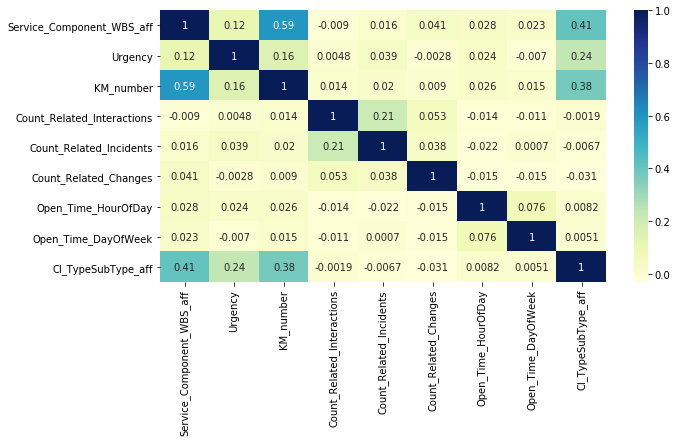

In [15]:
plt.figure(figsize=(10,5))
sns.heatmap(corrMatrixNoCIName, cmap="YlGnBu", annot=True)

In [16]:
df_out = df.drop(['CI_Name_aff', 'Impact'], axis='columns')

In [17]:
df_out.columns

Index(['Service_Component_WBS_aff', 'Urgency', 'KM_number',
       'Count_Related_Interactions', 'Count_Related_Incidents',
       'Count_Related_Changes', 'SLAFail', 'Open_Time_HourOfDay',
       'Open_Time_DayOfWeek', 'CI_TypeSubType_aff'],
      dtype='object')

In [19]:
with open("data/05.00 Incident Data.csv",'w') as fo:
    df_out.to_csv(fo, index=False)